#  Customer Segmentation - Clustering Project

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("PBL5recommendationdata.csv",encoding="latin-1" )

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [4]:
df.shape

(4194, 181)

In [5]:
df_customer=df[[
 'Customers.id',
 'Customers.fname',
 'Customers.lname',
 'Customers.company',
 'Customers.create_date',
 'Customers.status',
 'Customers.mailing',
 'Customers.reminders',
 'Customers.tax_exempt',
 'Customers.account_id',
 'Customers.sales_rep',
 'Customers.rewards',
 'Customers.profile_id',
 'Customers.last_modified',
 'Customers.customer_type'
               ]]

In [6]:
df_orders=df[['Orders.id',
 'Orders.customer_id',
 'Orders.fname',
 'Orders.lname',
 'Orders.company',
 'Orders.order_number',
 'Orders.reorder_id',
 'Orders.external_source',
 'Orders.external_id',
 'Orders.currency',
 'Orders.sales_rep',
 'Orders.subtotal',
 'Orders.tax',
 'Orders.shipping',
 'Orders.coupon_id',
 'Orders.coupon_amount',
 'Orders.gift_id',
 'Orders.gift_amount',
 'Orders.fee_name',
 'Orders.fee_amount',
 'Orders.discount_name',
 'Orders.discount_amount',
 'Orders.total',
 'Orders.balance_due',
 'Orders.shipping_carrier',
 'Orders.shipping_method',
 'Orders.shipping_trans',
 'Orders.shipping_flags',
 'Orders.weight',
 'Orders.tracking',
 'Orders.payment_status',
 'Orders.payment_date',
 'Orders.payment_user',
 'Orders.payment_type',
 'Orders.payment_method',
 'Orders.payment_amount',
 'Orders.purchase_order',
 'Orders.payment_id',
 'Orders.payment_code',
 'Orders.payment_ref',
 'Orders.status',
 'Orders.placed_date',
 'Orders.updated_date',
 'Orders.shipped_date',
 'Orders.comments',
 'Orders.notes',
 'Orders.registry_id',
 'Orders.gift_message',
 'Orders.website',
 'Orders.mailing',
 'Orders.flags',
 'Orders.partial_ship',
 'Orders.customer_type']]

In [7]:
df_products=df[['Products.id',
 'Products.status',
 'Products.product_type',
 'Products.template',
 'Products.vendor',
 'Products.import_id',
 'Products.name',
 'Products.display_name',
 'Products.menu_name',
 'Products.list_price',
 'Products.price',
 'Products.sale_price',
 'Products.cost',
 'Products.flags',
 'Products.left_flag',
 'Products.right_flag',
 'Products.last_modified',
 'Products.taxable',
 'Products.shopping_gtin',
 'Products.shopping_brand',
 'Products.shopping_mpn',
 'Products.shopping_gender',
 'Products.shopping_color',
 'Products.shopping_age',
 'Products.shopping_flags',
 'Products.amazon_asin',
 'Products.amazon_type',
 'Products.amazon_item_type',
 'Products.amazon_price',
 'Products.google_shopping_id',
 'Products.google_shopping_type',
 'Products.google_shopping_cat',
 'Products.google_adwords',
 'Products.shopping_cat',
 'Products.shopping_type',
 'Products.pricegrabber_cat',
 'Products.shopzilla_cat',
 'Products.thefind_cat',
 'Products.quickbooks_id',
 'Products.qb_edit_sequence',
 'Products.price_break_type',
 'Products.price_breaks',
 'Products.short_description',
 'Products.long_description',
 'Products.websites',
 'Products.video',
 'Products.audio',
 'Products.seo_title',
 'Products.seo_description',
 'Products.seo_keywords',
 'Products.seo_header',
 'Products.seo_footer',
 'Products.seo_url',
 'Products.seo_category',
 'Products.unit',
 'Products.packaging',
 'Products.display_packaging',
 'Products.multiple',
 'Products.length',
 'Products.width',
 'Products.height',
 'Products.rx',
 'Products.latex',
 'Products.upc',
 'Products.msds_link',
 'Products.msds_label',
 'Products.lit_link',
 'Products.lit_label',
 'Products.hcpcs',
 'Products.case_qty',
 'Products.markup',
 'Products.override_markup',
 'Products.notes',
 'Products.import_flags',
 'Products.map_price',
 'Products.features_title',
 'Products.warranty',
 'Products.hygienic',
 'Products.default_quantity',
 'Products.user_size',
 'Products.assembly',
 'Products.installation',
 'Products.shipping_length',
 'Products.shipping_width',
 'Products.shipping_height',
 'Products.shipping_weight',
 'Products.handling_time',
 'Products.rotation_link',
 'Products.google_shopping_label',
 'Products.product_option',
 'Products.size',
 'Products.material',
 'Products.arm_style',
 'Products.leg_style',
 'Products.seat_size',
 'Products.family_id',
 'Products.saved_status',
 'Products.freight_cost']]

In [8]:
import sqlite3

In [9]:
conn = sqlite3.connect('customersegmentation.db')

In [10]:
df_customer.to_sql('customers', conn, if_exists='replace', index=False)
df_orders.to_sql('orders', conn, if_exists='replace', index=False)
df_products.to_sql('products', conn, if_exists='replace', index=False)

4194

In [11]:
conn.close()

In [12]:
import pandas as pd
import sqlite3

In [13]:
conn = sqlite3.connect('customersegmentation.db')

In [14]:
query1 = "SELECT * FROM customers"
df1 = pd.read_sql_query(query1, conn)

In [15]:
query2 = "SELECT * FROM orders"
df2 = pd.read_sql_query(query2, conn)

In [16]:
query3 = "SELECT * FROM products"
df3 = pd.read_sql_query(query3, conn)

In [17]:
merged_df = pd.concat([df1, df2, df3], ignore_index=True, axis=1)

In [18]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [19]:
df["Orders.payment_code"].value_counts()

02708Z    10
13828      9
06148Z     8
39806      8
3616       6
          ..
T6253B     1
T5756B     1
322360     1
30495      1
04142D     1
Name: Orders.payment_code, Length: 2848, dtype: int64

In [20]:
df.shape

(4194, 181)

In [21]:
df = df.dropna(axis=1, how='all') #tamamı boş olan kolonları sildim

In [22]:
df.shape

(4194, 147)

In [23]:
threshold = len(df) * 0.6 
df = df.dropna(axis=1, thresh=threshold)# %60ı ve üstü boş olanları sildim

In [24]:
df.shape

(4194, 78)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   int64  
 4   Customers.last_modified        4194 non-null   int64  
 5   Customers.customer_type        3771 non-null   float64
 6   Orders.id                      4194 non-null   int64  
 7   Orders.customer_id             4194 non-null   int64  
 8   Orders.fname                   4194 non-null   object 
 9   Orders.lname                   4194 non-null   object 
 10  Orders.order_number            4194 non-null   object 
 11  Orders.currency                4194 non-null   object 
 12  Orders.subtotal                4194 non-null   f

In [26]:
cols_to_drop = [col for col in df.columns if 'id' in col]
df = df.drop(cols_to_drop, axis=1)  #içinde _id kelimesi geçen kolonları sildim

In [27]:
df.shape

(4194, 65)

In [28]:
cols_to_drop = ["Customers.fname", "Customers.lname","Orders.fname", "Orders.lname","Products.amazon_asin",
                "Products.seo_url", "Products.shopping_mpn", "Orders.currency","Customers.create_date","Customers.last_modified",
               "Products.long_description", "Products.seo_title","Products.hcpcs", "Products.display_name", "Orders.payment_date",
                "Orders.order_number","Orders.tracking", "Orders.payment_code","Products.google_shopping_type",
                "Products.multiple"
               ]
df = df.drop(cols_to_drop, axis=1) #manuel olarak bazı kolonları sildim

In [29]:
df.shape

(4194, 45)

In [30]:
df.fillna(0, inplace=True) #boşlukları 0la doldurdum

In [31]:
df.isnull().sum()

Customers.customer_type         0
Orders.subtotal                 0
Orders.tax                      0
Orders.shipping                 0
Orders.total                    0
Orders.shipping_carrier         0
Orders.shipping_method          0
Orders.payment_status           0
Orders.payment_type             0
Orders.payment_amount           0
Orders.status                   0
Orders.placed_date              0
Orders.updated_date             0
Orders.shipped_date             0
Orders.customer_type            0
Order_Items.parent              0
Order_Items.product_name        0
Order_Items.qty                 0
Order_Items.price               0
Order_Items.cost                0
Products.status                 0
Products.template               0
Products.vendor                 0
Products.name                   0
Products.list_price             0
Products.price                  0
Products.cost                   0
Products.flags                  0
Products.last_modified          0
Products.taxab

In [32]:
df["Orders.shipping_carrier"].value_counts()

fedex     2304
manual    1203
0          617
ups         57
NSVA         5
WTVA         2
NDSN         1
INTF         1
MT03         1
HWEP         1
FEDX         1
RDWY         1
Name: Orders.shipping_carrier, dtype: int64

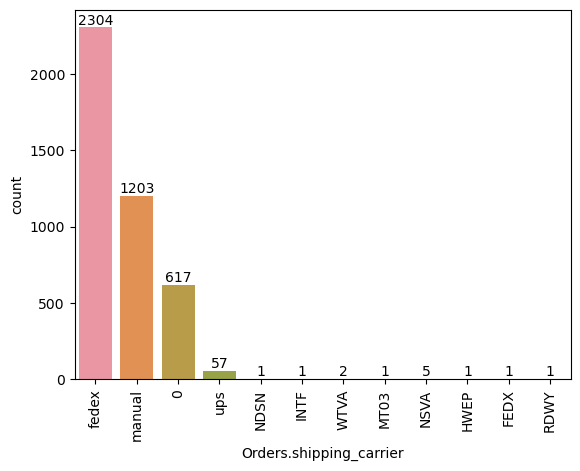

In [33]:
ax=sns.countplot(x=df["Orders.shipping_carrier"])
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0]);

In [34]:
df['Orders.shipping_method'].replace('11|Ground', 'Ground', inplace=True)
df['Orders.shipping_method'].replace('0|Standard Shipping', 'Standard Shipping', inplace=True)
df['Orders.shipping_method'].replace("-1|Free Shipping", 'Free Shipping', inplace=True)
df['Orders.shipping_method'].replace('0|Free Shipping', 'Free Shipping', inplace=True)

df["Orders.shipping_method"].value_counts()

Ground                       2474
Standard Shipping             902
0                             443
Free Shipping                 358
NATIONAL DELIVERY               6
WILSON TRUCKING CORP            2
HOWARD'S EXPRESS, INC.          2
NATIONAL DELIVERY SYSTEMS       1
LAND AIR OF NEW ENGLAND         1
INTERNATIONAL FEDEX             1
SOUTHWESTERN MOTOR TRNAS        1
MEDTRANS                        1
FEDERAL EXPRESS CORP.           1
ROADWAY EXPRESS                 1
Name: Orders.shipping_method, dtype: int64

In [35]:
df["Orders.payment_type"].value_counts()

authorize.net    3454
0                 384
paypal            318
Credit Card        32
Check               5
Cash                1
Name: Orders.payment_type, dtype: int64

In [36]:
df["Order_Items.product_name"].value_counts()

Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size                                                              53
Silent Knight Pill Crusher Pouches                                                                                                    48
Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack                                                                               47
Medline Deluxe Aluminum Transport Chair With Hand Brakes, Red, Wheels Front 8" Back 12", Leightweight Weighs 23 Lbs, Cap. 300 Lbs.    46
K1 Basic Extra-Wide Wheelchairs                                                                                                       36
                                                                                                                                      ..
CURAD Flex-Fabric Bandages, Brown, Yes                                                                                                 1
CURAD Comfort Fabric Bandages, Tan, No   

In [37]:
df["Products.template"].value_counts()

sub-product-detail.html    3886
0                           221
product-detail.html          87
Name: Products.template, dtype: int64

In [38]:
df["Products.shopping_brand"].value_counts()

MEDLINE                 2672
Drive Medical            535
0                        162
HARTMANN-CONCO INC       122
CanDo&reg;               113
                        ... 
PERRIGO                    1
DeVilbiss Healthcare       1
AcuForce&reg;              1
AdvanTrode&reg;            1
Val-u-Band                 1
Name: Products.shopping_brand, Length: 102, dtype: int64

In [40]:
df['Products.packaging'] = df['Products.packaging'].str.extract(r'(\d+)')


In [41]:
df["Products.amazon_item_type"].value_counts()

health-care-products    4015
0                        179
Name: Products.amazon_item_type, dtype: int64

In [42]:
df["Products.google_shopping_cat"].value_counts()

Health & Beauty > Health Care                                                                                                        3649
Health & Beauty > Health Care > Mobility & Accessibility > Accessibility Equipment > Wheelchairs                                      281
0                                                                                                                                     183
Health & Beauty > Health Care > Mobility & Accessibility > Accessibility Equipment > Wheelchairs > Manual Wheelchairs                  67
Health & Beauty > Health Care > Mobility & Accessibility > Walking Aids > Walkers                                                      12
Health & Beauty > Health Care > Biometric Monitor Accessories > Blood Pressure Monitor Accessories > Blood Pressure Monitor Cuffs       2
Name: Products.google_shopping_cat, dtype: int64

In [43]:
df["Products.unit"].value_counts()

EA      1773
CS      1337
BX       362
0        209
CV       165
PK       122
PR        72
BG        65
GR        18
CASE      13
BT        11
SET       11
KT         8
BOX        6
ST         6
DZ         5
PKG        4
RL         3
PAIR       2
TB         1
CN         1
Name: Products.unit, dtype: int64

In [44]:
df['Products.packaging'].fillna(0, inplace=True)

In [45]:
df['Products.packaging'] = df['Products.packaging'].astype(int)


In [46]:
df.head()

,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.parent,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.status,Products.template,Products.vendor,Products.name,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_cat,Products.qb_edit_sequence,Products.short_description,Products.seo_category,Products.unit,Products.packaging,Products.case_qty,Products.import_flags,Products.shipping_length,Products.shipping_height,Products.saved_status
0,0.0,57.20,0.0,9.95,64.29,fedex,Ground,3.0,authorize.net,64.29,1,1426019099,1.438868e+09,1.426101e+09,0.0,3758,"Basic Rollators, Green",1,57.20,44.00,0.0,sub-product-detail.html,1.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,0.0,1.463163e+09,1.0,1.088440e+13,MEDLINE,62.0,health-care-products,Health & Beauty > Health Care,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN",0.0,EA,1,1.0,136.0,24.80,30.40,0.0
1,0.0,20.00,0.0,9.99,29.99,fedex,Ground,3.0,authorize.net,29.99,1,1386090455,1.440529e+09,1.386103e+09,0.0,23,"Urinary Drain Bags,0.000",4,5.00,1.87,1.0,sub-product-detail.html,1.0,Urinary Drain Bags,14.41,10.29,1.87,65.0,1.462370e+09,1.0,1.008020e+13,MEDLINE,62.0,health-care-products,Health & Beauty > Health Care,1.450322e+09,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",0.0,EA,1,1.0,0.0,8.00,1.50,0.0
2,0.0,68.78,0.0,9.95,78.73,manual,Standard Shipping,3.0,authorize.net,78.73,3,1449603652,1.450213e+09,0.000000e+00,0.0,9531,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,0.0,sub-product-detail.html,1.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,32896.0,1.463163e+09,1.0,4.008020e+13,MEDLINE,62.0,health-care-products,Health & Beauty > Health Care,1.450321e+09,"GLOVE,EXAM,NITRILE,BLUE,FINGRTIP,TXT,XXL",0.0,CS,800,800.0,0.0,13.23,10.24,0.0
3,0.0,19.56,0.0,9.95,29.55,0,Ground,3.0,0,29.55,1,1386780263,1.440529e+09,1.386800e+09,0.0,29,Basket for 2-Button Walkers,1,19.56,12.62,0.0,sub-product-detail.html,1.0,Basket for 2-Button Walkers,27.38,19.56,12.62,0.0,1.462595e+09,1.0,0.000000e+00,MEDLINE,62.0,health-care-products,Health & Beauty > Health Care,1.450323e+09,"BASKET,WALKER,FOR 2 BUTTON WALK",0.0,EA,1,1.0,0.0,10.60,18.50,0.0
4,0.0,36.05,0.0,9.95,46.00,fedex,Ground,3.0,0,46.00,1,1386861599,1.440529e+09,1.386876e+09,0.0,30,Tens Units,1,36.05,25.75,1.0,sub-product-detail.html,1.0,TENS 3000 Analog Unit,50.47,36.05,25.75,0.0,1.462370e+09,1.0,0.000000e+00,ROSCOE MEDICAL INC,62.0,health-care-products,Health & Beauty > Health Care,1.450323e+09,"DEVICE,TENS UNIT,TENS 1000,DUAL CH",0.0,EA,1,1.0,0.0,8.50,12.00,0.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customers.customer_type       4194 non-null   float64
 1   Orders.subtotal               4194 non-null   float64
 2   Orders.tax                    4194 non-null   float64
 3   Orders.shipping               4194 non-null   float64
 4   Orders.total                  4194 non-null   float64
 5   Orders.shipping_carrier       4194 non-null   object 
 6   Orders.shipping_method        4194 non-null   object 
 7   Orders.payment_status         4194 non-null   float64
 8   Orders.payment_type           4194 non-null   object 
 9   Orders.payment_amount         4194 non-null   float64
 10  Orders.status                 4194 non-null   int64  
 11  Orders.placed_date            4194 non-null   int64  
 12  Orders.updated_date           4194 non-null   float64
 13  Ord

In [48]:
df['Products.name'] = df['Products.name'].str.split(',').str[0]




In [49]:
df['Products.name'] = df['Products.name'].str.replace('<', '')

In [50]:
df['Products.name'] = df['Products.name'].astype(str)
alt_birim_atamalari = {alt_birim: i+1 for i, alt_birim in enumerate(sorted(df['Products.name'].unique()))}
df['Products.name'] = df['Products.name'].map(alt_birim_atamalari)

In [51]:
df['Products.name'] = df['Products.name'].fillna('')
alt_birim_atamalari = {alt_birim: i+1 for i, alt_birim in enumerate(sorted(df['Products.name'].unique()))}
df['Products.name'] = df['Products.name'].map(alt_birim_atamalari)


In [52]:
df['Products.shopping_brand'] = df['Products.shopping_brand'].astype(str)
alt_birim_atamalari = {alt_birim: i+1 for i, alt_birim in enumerate(sorted(df['Products.shopping_brand'].unique()))}
df['Products.shopping_brand'] = df['Products.shopping_brand'].map(alt_birim_atamalari)

In [53]:
df['Products.unit'] = df['Products.unit'].astype(str)
alt_birim_atamalari = {alt_birim: i+1 for i, alt_birim in enumerate(sorted(df['Products.unit'].unique()))}
df['Products.unit'] = df['Products.unit'].map(alt_birim_atamalari)

In [54]:
df['Order_Items.product_name'] = df['Order_Items.product_name'].astype(str)
alt_birim_atamalari = {alt_birim: i+1 for i, alt_birim in enumerate(sorted(df['Order_Items.product_name'].unique()))}
df['Order_Items.product_name'] = df['Order_Items.product_name'].map(alt_birim_atamalari)

In [55]:
df['Products.google_shopping_cat'] = df['Products.google_shopping_cat'].str.split('>', 1).str[0]

In [56]:
df['Products.short_description'] = df['Products.short_description'].str.split(',').str[0]

In [57]:
dummy_df = pd.get_dummies(df["Orders.shipping_carrier"], prefix="Orders.shipping_carrier", drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

dummy_df = pd.get_dummies(df["Orders.shipping_method"], prefix="Orders.shipping_method", drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

dummy_df = pd.get_dummies(df["Orders.payment_type"], prefix="Orders.payment_type", drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

dummy_df = pd.get_dummies(df["Products.template"], prefix="Products.template", drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

dummy_df = pd.get_dummies(df["Products.amazon_item_type"], prefix="Products.amazon_item_type", drop_first=True)
df = pd.concat([df, dummy_df], axis=1)


In [58]:
column_names = df.columns.tolist()
formatted_column_names = ', '.join(f"'{col}'" for col in column_names)
print(formatted_column_names)

'Customers.customer_type', 'Orders.subtotal', 'Orders.tax', 'Orders.shipping', 'Orders.total', 'Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.payment_status', 'Orders.payment_type', 'Orders.payment_amount', 'Orders.status', 'Orders.placed_date', 'Orders.updated_date', 'Orders.shipped_date', 'Orders.customer_type', 'Order_Items.parent', 'Order_Items.product_name', 'Order_Items.qty', 'Order_Items.price', 'Order_Items.cost', 'Products.status', 'Products.template', 'Products.vendor', 'Products.name', 'Products.list_price', 'Products.price', 'Products.cost', 'Products.flags', 'Products.last_modified', 'Products.taxable', 'Products.shopping_gtin', 'Products.shopping_brand', 'Products.shopping_flags', 'Products.amazon_item_type', 'Products.google_shopping_cat', 'Products.qb_edit_sequence', 'Products.short_description', 'Products.seo_category', 'Products.unit', 'Products.packaging', 'Products.case_qty', 'Products.import_flags', 'Products.shipping_length', 'Products.shipping_heigh

In [77]:
x=df[[
    'Customers.customer_type', 'Orders.subtotal', 'Orders.tax', 'Orders.shipping', 'Orders.total', 
      'Orders.payment_status',  
    'Orders.payment_amount', 'Orders.status', 'Orders.placed_date', 'Orders.updated_date', 'Orders.shipped_date',
    'Orders.customer_type', 'Order_Items.parent', 'Order_Items.product_name', 'Order_Items.qty', 
    'Order_Items.price', 'Order_Items.cost', 'Products.status',  'Products.vendor', 
    'Products.name', 'Products.list_price', 'Products.price', 'Products.cost', 'Products.flags', 
    'Products.last_modified', 'Products.taxable',  'Products.shopping_brand', 
    'Products.shopping_flags',   
    'Products.qb_edit_sequence', 'Products.seo_category', 'Products.unit', 
    'Products.packaging', 'Products.case_qty', 'Products.import_flags', 'Products.shipping_length',
    'Products.shipping_height', 'Products.saved_status', 'Orders.shipping_carrier_FEDX', 
    'Orders.shipping_carrier_HWEP', 'Orders.shipping_carrier_INTF', 'Orders.shipping_carrier_MT03', 
    'Orders.shipping_carrier_NDSN', 'Orders.shipping_carrier_NSVA', 'Orders.shipping_carrier_RDWY', 
    'Orders.shipping_carrier_WTVA', 'Orders.shipping_carrier_fedex', 'Orders.shipping_carrier_manual', 
    'Orders.shipping_carrier_ups', 'Orders.shipping_method_FEDERAL EXPRESS CORP.', 
    'Orders.shipping_method_Free Shipping', 'Orders.shipping_method_Ground', 
    "Orders.shipping_method_HOWARD'S EXPRESS, INC.", 'Orders.shipping_method_INTERNATIONAL FEDEX', 
    'Orders.shipping_method_LAND AIR OF NEW ENGLAND', 'Orders.shipping_method_MEDTRANS', 
    'Orders.shipping_method_NATIONAL DELIVERY', 'Orders.shipping_method_NATIONAL DELIVERY SYSTEMS', 
    'Orders.shipping_method_ROADWAY EXPRESS', 'Orders.shipping_method_SOUTHWESTERN MOTOR TRNAS', 
    'Orders.shipping_method_Standard Shipping', 'Orders.shipping_method_WILSON TRUCKING CORP', 
    'Orders.payment_type_Cash', 'Orders.payment_type_Check', 'Orders.payment_type_Credit Card', 
    'Orders.payment_type_authorize.net', 'Orders.payment_type_paypal', 'Products.template_product-detail.html', 
    'Products.template_sub-product-detail.html', 'Products.amazon_item_type_health-care-products'
 
    
    
]]

In [78]:
for kolon in df.columns:
    if 'Health & Beauty ' in df[kolon].values:
        print(f"'Health & Beauty ' değeri {kolon} kolonunda bulunuyor.")

'Health & Beauty ' değeri Products.google_shopping_cat kolonunda bulunuyor.


In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [130]:
model=KMeans(9)

In [131]:
model=model.fit(x)

In [132]:
tahmin=model.predict(x)

In [133]:
x["cluster"]=tahmin

In [134]:
silhouette_score(x,tahmin)

0.6884808013267149

In [135]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_  
        print("Cluster", i, "score", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [136]:
clust(10)

Cluster 2 score 0.8370219737961877
Cluster 3 score 0.9094694602009892
Cluster 4 score 0.9421725615044226
Cluster 5 score 0.9668713725024862
Cluster 6 score 0.9735160904183294
Cluster 7 score 0.9786206127113477
Cluster 8 score 0.9805572796935271
Cluster 9 score 0.6887340780003667
Cluster 10 score 0.6830709437650703


In [137]:
x["cluster"].value_counts()

8    2108
0    1362
3     240
1     233
2     145
4      71
5      18
6      12
7       5
Name: cluster, dtype: int64

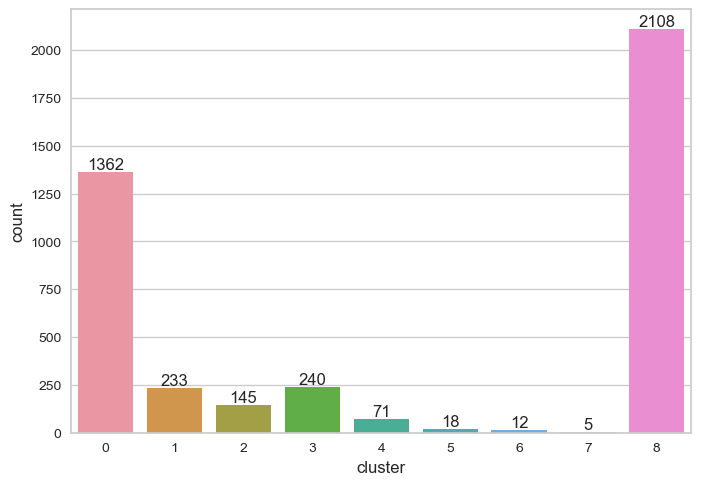

In [138]:
ax=sns.countplot(x=x["cluster"])
ax.bar_label(ax.containers[0]);

In [139]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [140]:
link_data=linkage(x,method="ward", metric="euclidean")

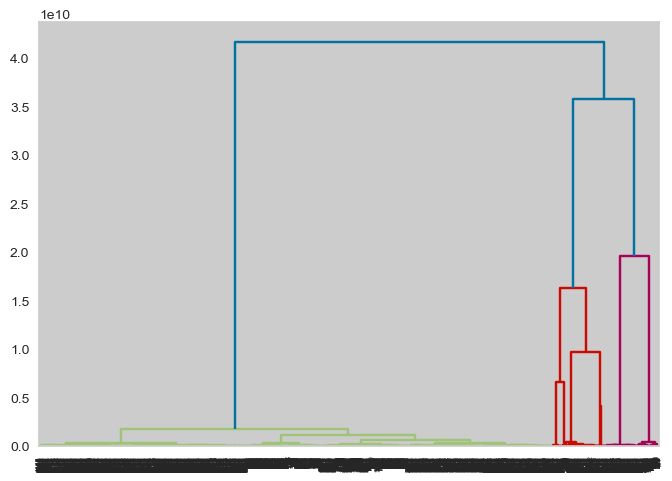

In [141]:
dendrogram(link_data)
plt.show()

In [142]:
from sklearn.cluster import DBSCAN

In [143]:
clusters=DBSCAN(eps=2.5,min_samples=4).fit(x)

In [144]:
labels=model.labels_

In [145]:
from sklearn import metrics

In [146]:
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[clusters.core_sample_indices_]=True

In [147]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)



print(metrics.silhouette_score(x,labels))

0.6884808013267149


In [148]:
x["Customers.customer_type"]=df["Customers.customer_type"]

In [149]:
x[x["cluster"]==1]

,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.parent,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.status,Products.vendor,Products.name,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_flags,Products.qb_edit_sequence,Products.seo_category,Products.unit,Products.packaging,Products.case_qty,Products.import_flags,Products.shipping_length,Products.shipping_height,Products.saved_status,Orders.shipping_carrier_FEDX,Orders.shipping_carrier_HWEP,Orders.shipping_carrier_INTF,Orders.shipping_carrier_MT03,Orders.shipping_carrier_NDSN,Orders.shipping_carrier_NSVA,Orders.shipping_carrier_RDWY,Orders.shipping_carrier_WTVA,Orders.shipping_carrier_fedex,Orders.shipping_carrier_manual,Orders.shipping_carrier_ups,Orders.shipping_method_FEDERAL EXPRESS CORP.,Orders.shipping_method_Free Shipping,Orders.shipping_method_Ground,"Orders.shipping_method_HOWARD'S EXPRESS, INC.",Orders.shipping_method_INTERNATIONAL FEDEX,Orders.shipping_method_LAND AIR OF NEW ENGLAND,Orders.shipping_method_MEDTRANS,Orders.shipping_method_NATIONAL DELIVERY,Orders.shipping_method_NATIONAL DELIVERY SYSTEMS,Orders.shipping_method_ROADWAY EXPRESS,Orders.shipping_method_SOUTHWESTERN MOTOR TRNAS,Orders.shipping_method_Standard Shipping,Orders.shipping_method_WILSON TRUCKING CORP,Orders.payment_type_Cash,Orders.payment_type_Check,Orders.payment_type_Credit Card,Orders.payment_type_authorize.net,Orders.payment_type_paypal,Products.template_product-detail.html,Products.template_sub-product-detail.html,Products.amazon_item_type_health-care-products,cluster
537,0.0,48.98,0.00,9.95,58.93,3.0,58.93,1,1453410180,1.454960e+09,1.453486e+09,0.0,11734,1689,1,12.36,7.06,0.0,1.0,1075,17.30,12.36,7.06,0.0,1.463163e+09,0.0,62,62.0,0.0,0.0,2,24,24.0,0.0,0.001,0.001,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
628,0.0,241.56,0.00,0.00,241.56,3.0,241.56,1,1454876244,1.456956e+09,1.454981e+09,0.0,12514,346,1,42.48,30.78,0.0,1.0,256,59.47,42.48,30.78,0.0,1.463163e+09,0.0,62,62.0,0.0,0.0,8,168,168.0,0.0,15.800,8.250,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
631,0.0,189.45,0.00,0.00,189.45,3.0,189.45,1,1460317894,1.460426e+09,1.460422e+09,0.0,15408,346,1,42.48,30.78,0.0,1.0,256,59.47,42.48,30.78,0.0,1.463163e+09,0.0,62,62.0,0.0,0.0,8,168,168.0,0.0,15.800,8.250,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
1008,0.0,110.30,0.00,9.95,120.25,3.0,120.25,1,1454343084,1.454961e+09,1.454365e+09,0.0,12239,347,2,55.15,42.10,0.0,1.0,256,77.21,55.15,42.10,0.0,1.463163e+09,0.0,62,62.0,0.0,0.0,8,336,336.0,0.0,18.000,13.000,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
1234,0.0,109.16,0.00,9.95,108.19,3.0,108.19,1,1462900041,1.463010e+09,1.463006e+09,0.0,17048,346,2,54.58,39.55,0.0,1.0,256,76.41,54.58,39.55,0.0,1.463163e+09,0.0,62,62.0,0.0,0.0,8,168,168.0,0.0,17.000,9.000,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,1.0,198.31,0.00,0.00,198.31,3.0,198.31,1,1463065765,1.463148e+09,1.463148e+09,1.0,17207,722,1,8.04,2.01,3.0,9.0,492,15.99,8.04,2.01,0.0,1.453933e+09,0.0,38,62.0,0.0,0.0,1,1,0.0,0.0,8.000,4.000,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
4130,0.0,68.78,0.00,9.95,71.85,3.0,71.85,1,1463066853,1.463148e+09,1.463148e+09,0.0,17208,739,1,68.78,52.50,0.0,5.0,500,75.00,68.78,52.50,0.0,1.457981e+09,0.0,37,62.0,0.0,0.0,11,0,0.0,64.0,11.000,3.000,0.0,0,0,0,0,0,0,0,0,

In [150]:
x.groupby("cluster")["Customers.customer_type"].unique()

cluster
0         [0.0, 1.0]
1    [0.0, 1.0, 2.0]
2    [0.0, 1.0, 2.0]
3    [0.0, 1.0, 2.0]
4    [0.0, 1.0, 2.0]
5    [0.0, 1.0, 2.0]
6              [0.0]
7         [0.0, 1.0]
8    [0.0, 1.0, 2.0]
Name: Customers.customer_type, dtype: object

In [151]:
from yellowbrick.cluster import KElbowVisualizer

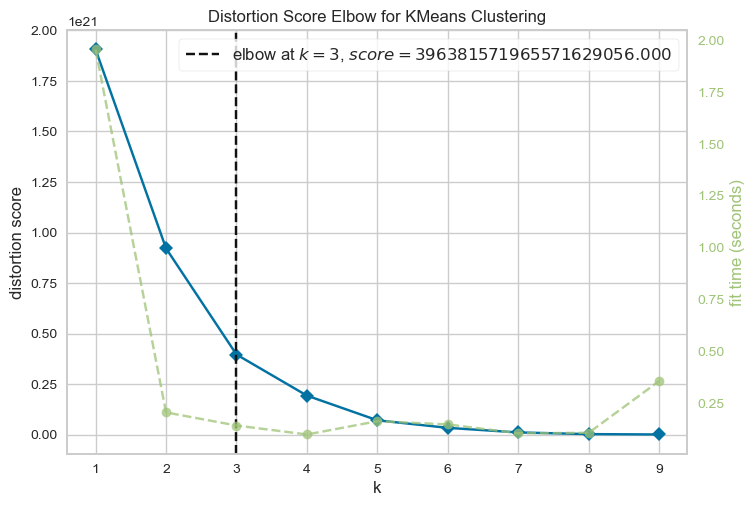

In [152]:
model = KMeans(random_state=42)


visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(x)


visualizer.show()
plt.show()